# Python Basics: Data Analysis & Fitting
**Objective:** In this notebook, you will analyze data from a hypothetical physics experiment (Hooke's Law). You will learn how to store data, visualize it, and fit a model to it. This Notebook will be useful to complete the 2nd part of the Project 1 on the Photoelectric Effect.

### 1. Import Libraries
First, we need to import the libraries we will use.
* `numpy`: For math operations.
* `pandas`: For creating tables (DataFrames).
* `matplotlib.pyplot`: For plotting graphs.
* `scipy.optimize`: For fitting curves to data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print("Libraries imported successfully!")

Libraries imported successfully!


### Task 1: Variables
**Goal:** Create a variable named `gravity` and assign it the value `9.81`. Then, print the value.

You can Google how to assign a variable to a value.

In [ ]:
# TODO: Create a variable 'gravity' and assign it 9.81
g = 9.81

# TODO: Print the variable
print(g)

9.81


### Task 2: Data Tables
**Goal:** Create a Pandas DataFrame named `df` with the following data:
* **Displacement (m):** 0.05, 0.10, 0.15, 0.20, 0.25
* **Force (N):** 0.45, 1.10, 1.60, 1.95, 2.55

Once again, you can google to learn more about dataframes and how to do the conversion.

In [ ]:
# TODO: Create a dictionary with the data
data = {
    'Displacement': [0.05, 0.10, 0.15, 0.20, 0.25], # Fill in the list
    'Force': [0.45, 1.10, 1.60, 1.95, 2.55]         # Fill in the list
}

# TODO: Convert the dictionary to a Pandas DataFrame named 'df'
df = pd.DataFrame(data)

# TODO: Display the first few rows of the DataFrame
print(df.head()) # <-- Uncomment this line once 'df' is defined

   Displacement  Force
0          0.05   0.45
1          0.10   1.10
2          0.15   1.60
3          0.20   1.95
4          0.25   2.55


### Task 3: Functions
**Goal:** Create a function called `linear_model` that takes inputs `x`, `k`, and `b` and returns $k \cdot x + b$.
*Test your function with x=2, k=5, b=0.*

Again, google is your friend.

In [ ]:
# TODO: Define the function linear_model(x, k, b)
def linear_model(x,k,b):
    return k * x + b


# TODO: Test the function with x=2, k=5, b=0 and print the result
print(linear_model(2,5,0))

10


### Task 4: Plotting
**Goal:** Create a scatter plot of your data.
* X-axis: Displacement
* Y-axis: Force
* Add a title and labels for the axes.

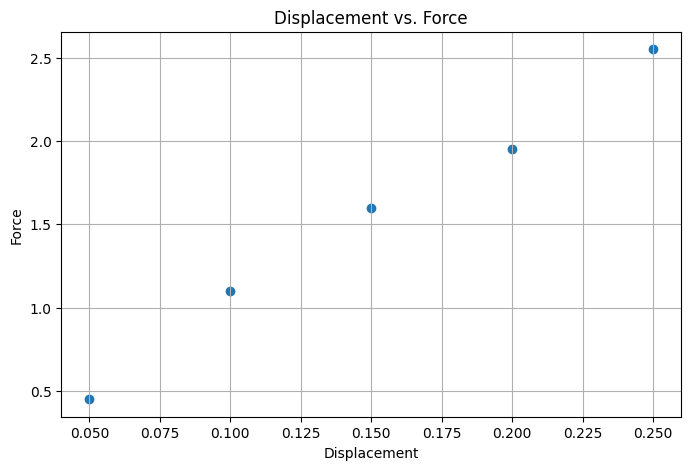

In [ ]:
plt.figure(figsize=(8, 5))

# TODO: Plot the data using plt.scatter(x, y)
x = df['Displacement']
y = df['Force']
plt.scatter(x,y)


# TODO: Add title, xlabel, and ylabel
plt.xlabel("Displacement")
plt.ylabel("Force")
plt.title("Displacement vs. Force")


plt.grid(True)
plt.show()

### Task 5: Curve Fitting
**Goal:** Fit the model to the data to find the spring constant $k$.
1. Use `curve_fit` to find optimal `k` and `b` with the errors on these values. Plot the original data **with error bars** (error = 0.2 N).
2. Plot the "Best Fit Line" on top.

Optimal Spring Constant (k): 10.10 ± 0.55 N/m
Optimal Intercept (b): 0.02 ± 0.09 N


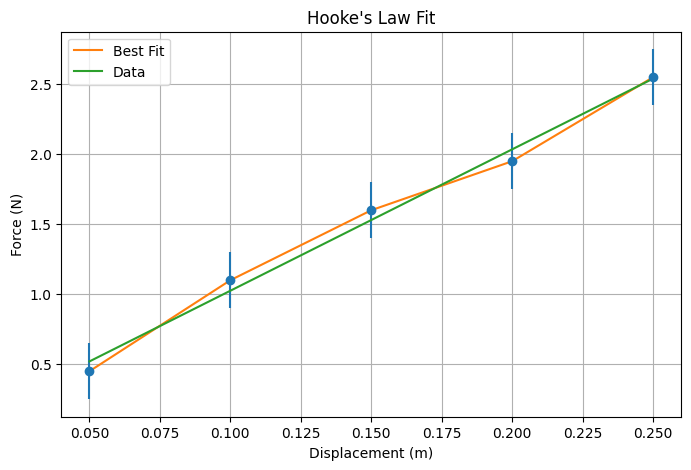

In [ ]:
# 1. Fit the model
# curve_fit takes: function, x_data, y_data
popt, pcov = curve_fit(linear_model, df['Displacement'], df['Force']) # <--- Student uncomments this

# Extract the optimal k and b
k_opt, b_opt = popt

# TODO: Calculate the standard deviation errors
# Hint: The variance is the diagonal of the covariance matrix (pcov).
#       The standard deviation is the square root of the variance.
perr = np.sqrt(np.diag(pcov)) # <--- Student uncomments this
k_err, b_err = perr           # <--- Student uncomments this

# TODO: Update these print statements to include the error (e.g., k_opt ± k_err)
print(f"Optimal Spring Constant (k): {k_opt:.2f} ± {k_err:.2f} N/m")
print(f"Optimal Intercept (b): {b_opt:.2f} ± {b_err:.2f} N")

# 2. Plotting
plt.figure(figsize=(8, 5))

# TODO: Use plt.errorbar() to plot the data with yerr=0.2 and fmt='o' (for dots)
plt.errorbar(x,y,yerr=0.2,fmt='o')

# TODO: Generate y-values for the line using the optimal parameters (k_opt, b_opt)
line_y = linear_model(df['Displacement'], k_opt, b_opt)

# TODO: Plot the line_y on top of the scatter plot.
plt.plot(x,y)
plt.plot(x,line_y)
# Challenge: Can you add the error value to the label? (e.g., label=f'Fit: k={k_opt:.2f} ± {k_err:.2f}')


# Formatting
plt.title("Hooke's Law Fit")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")
plt.legend(['Best Fit', 'Data'])
plt.grid(True)

### Task 6: Exporting
**Goal:** Save the figure as a `.png` file and download it.

This section could be tricky. Google it to figure out a way to have a picture of your figure.

In [ ]:
# TODO: Save the current figure using plt.savefig()
filename = "spring_experiment_plot.png"


print(f"Plot saved as {filename}")

# Helper code to download the file in Google Colab
from google.colab import files
files.download(filename) # <-- Uncomment to download

Plot saved as spring_experiment_plot.png


FileNotFoundError: Cannot find file: spring_experiment_plot.png